# SVD в компрессии изображений

In [1]:
import numpy as np
from numpy.linalg import norm
from numpy.linalg import svd



import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import img_as_ubyte,img_as_float
from ipywidgets import interact

In [2]:
image = mpimg.imread('python.jpg')
img = np.array(image) # делает массив редактируемым

In [3]:
print(f'img type:{type(img)}')
print(f'img size:{img.shape}')

img type:<class 'numpy.ndarray'>
img size:(600, 1080, 3)


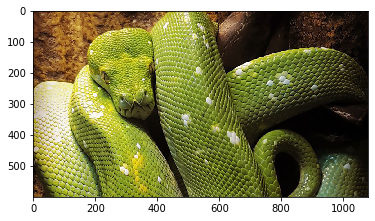

In [4]:
plt.imshow(img)
plt.show()

In [5]:
n_img = rgb2gray(img_as_float(img))
print(f'img type:{type(n_img)}')
print(f'img size:{n_img.shape}')

img type:<class 'numpy.ndarray'>
img size:(600, 1080)


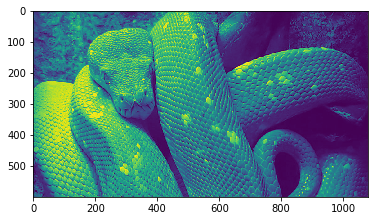

In [6]:
plt.imshow(n_img)
plt.show()

In [7]:
n_img

array([[0.19275725, 0.18099255, 0.16698784, ..., 0.03719098, 0.04111255,
        0.04895569],
       [0.19946157, 0.18883569, 0.17707098, ..., 0.02542627, 0.05287725,
        0.08032824],
       [0.21066078, 0.19497451, 0.18377529, ..., 0.01394431, 0.05287725,
        0.09209294],
       ...,
       [0.23520196, 0.23770196, 0.23770196, ..., 0.08314157, 0.08706314,
        0.08314157],
       [0.21784118, 0.22511882, 0.22622   , ..., 0.08090157, 0.08090157,
        0.07698   ],
       [0.15566157, 0.18311255, 0.22119725, ..., 0.08482314, 0.08482314,
        0.08090157]])

##### Использование SVD для сжатия изображения:

In [14]:
def compress_svd(image, k): # Параметр k задает степень сжатия
    """
    Perform svd decomposition and truncated (using k singular values/vectors) reconstruction
    returns
    --------
      reconstructed matrix reconst_matrix, array of singular values s
    """
    
    U,s,V = svd(image,full_matrices=False)
    reconst_matrix = np.dot(U[:,:k],np.dot(np.diag(s[:k]),V[:k,:]))
    
    return reconst_matrix,s

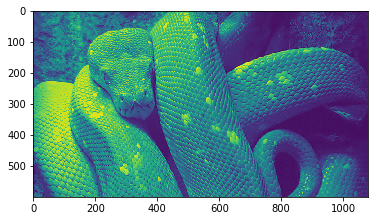

In [35]:
img2, s = compress_svd(n_img,300)
plt.imshow(img2)
plt.show()

In [32]:
def show_compressed_img(k): # 
    """
     compresses gray scale images and display the reconstructed image.
     Also displays a plot of singular values
    """
    image=n_img
    original_shape = image.shape
    reconst_img,s = compress_svd(image,k)
    fig,axes = plt.subplots(1,2,figsize=(12,5))
    axes[0].plot(s)
    compression_ratio =100.0* k/original_shape[0]
    axes[1].set_title("compression ratio={:.2f}".format(compression_ratio)+"%")
    axes[1].imshow(reconst_img, cmap='gray')
    axes[1].axis('off')
    fig.tight_layout()

In [33]:
interact(show_compressed_img,k=(1,600));

interactive(children=(IntSlider(value=300, description='k', max=600, min=1), Output()), _dom_classes=('widget-…

In [22]:
image.shape

(600, 1080, 3)